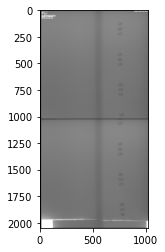

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# 载入彩色图
path = 'data/004.jpg'
img = cv.imread(path)
img = img[:, 500:500+1024]
img2 = img[:,:,::-1]
plt.imshow(img2)

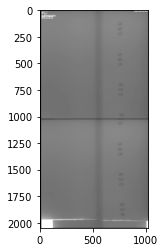

In [18]:
# 载入灰度图
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = img[:, 500:500+1024] # 裁减掉黑色部分
plt.imshow(img, cmap='gray')

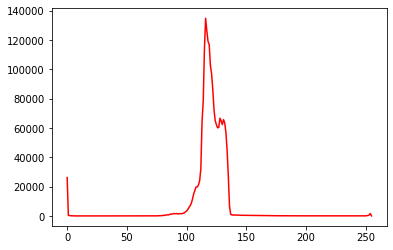

In [19]:
# 绘制灰度像素统计直方图，全范围从0到255
low, high = 0, 255
hist = cv.calcHist([img], [0], None, [high-low+1], [low, high])
plt.plot(np.arange(low, high+1, step=1), hist, color='r')

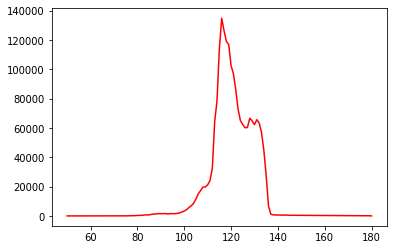

In [20]:
# 上图显然在0处有波峰，因为0是整个图片中占比最大的部分，也即黑色部分
# 250以上会有小段波峰，这个应该是由左右上角的两个字符标识造成的，也就是白色部分
# 统计范围调整为50到180
low, high = 50, 180
hist = cv.calcHist([img], [0], None, [high-low+1], [low, high])
plt.plot(np.arange(low, high+1, step=1), hist, color='r')

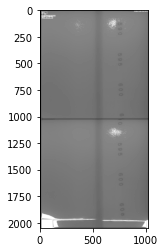

In [21]:
# 上图可见大部分像素应该落在140左右，这是左右两边颜色比较浅的区域，落在110左右的像素应该是较深的区域

# 较亮的区域
low, high = 135, 170
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = img[:, 500:500+1024] # 裁减掉黑色部分
img[np.logical_and(low<img, img<high)] = 255
plt.imshow(img, cmap='gray')


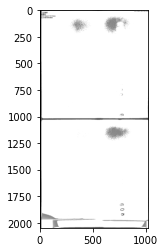

In [22]:
# 左边较暗的地方和中间焊缝
low, high = 100, 135
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = img[:, 500:500+1024] # 裁减掉黑色部分
img[np.logical_and(low<img, img<high)] = 255
plt.imshow(img, cmap='gray')

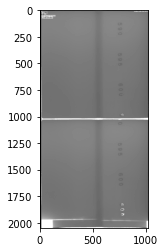

In [23]:
# 文字部分
low, high = 60, 100
img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = img[:, 500:500+1024] # 裁减掉黑色部分
img[np.logical_and(low<img, img<high)] = 255
plt.imshow(img, cmap='gray')